#### Preprocessing script for extraction and uniformization of dogs.
- Date : February 16th 2024
- Author : Aarya Bhave
- Project : Dog_Emotion_Classification
  
This code extracts dog images from the dataset and uniformizes them before augmentation and encoder forward pass.  
OpenCV version '4.9.0'  
PyTorch version '2.1.1'

In [3]:
import torch
import torchvision
import cv2
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

##### Load the YOLO Model.

In [4]:
detector_model = YOLO('utils/yolov8x.pt')

##### Crop and save dogs.

In [6]:
#RUN THIS CELL ONLY ONCE.
import shutil
from imutils import paths

directories = os.listdir('data/breed_arrangement')
for directory in directories:
    images_path = 'data/breed_arrangement/' + directory
    image_paths = list(paths.list_files(images_path))
    for image_path in image_paths:
        detection_results = detector_model(image_path)
        detection_results[0].save_crop('data/processed/YOLOCrops/' + directory)
    
    classifications = os.listdir('data/processed/YOLOCrops/' + directory)
    for classification in classifications:
        if classification != 'dog':
            shutil.rmtree('data/processed/YOLOCrops/' + directory + '/' + classification)


image 1/1 /home/aarya/Desktop/Dog_Emotion_Classification/data/breed_arrangement/Husky/husky_curious_19.jpg: 448x640 1 cat, 22.9ms
Speed: 0.7ms preprocess, 22.9ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/aarya/Desktop/Dog_Emotion_Classification/data/breed_arrangement/Husky/husky_angry_6.jpg: 448x640 1 dog, 22.4ms
Speed: 1.3ms preprocess, 22.4ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/aarya/Desktop/Dog_Emotion_Classification/data/breed_arrangement/Husky/husky_angry_10.jpeg: 640x448 1 dog, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /home/aarya/Desktop/Dog_Emotion_Classification/data/breed_arrangement/Husky/husky_happy_5.webp: 448x640 3 dogs, 23.0ms
Speed: 1.3ms preprocess, 23.0ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/aarya/Desktop/Dog_Emotion_Classification/data/breed_arrangement/Husky/husky_

##### Create the DataSet classes and build DataLoaders on top of them.

In [5]:
from imutils import paths

class GSDDataset(torch.utils.data.Dataset):
    def __init__(self, transform = None):
        self.root_dir = 'data/processed/YOLOCrops/German_Shepherd/dog'
        self.image_paths = list(paths.list_images(self.root_dir))
        self.transform = transform

    def __getitem__(self, index):
        sample = cv2.imread(self.image_paths[index])
        sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    def __len__(self):
        return len(self.image_paths)
    

In [8]:
class Standardize:
    def __call__(self, sample):
        sample = cv2.resize(sample, (1000, 1000))
        return sample

class Augment:
    def __call__(self, sample):
        sample = torchvision.transforms.Resize(224)

TypeError: Image data of dtype object cannot be converted to float

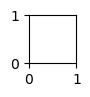

In [9]:
composed = torchvision.transforms.Compose([Augment()])#, torchvision.transforms.ToTensor()])
dataset = GSDDataset(transform=composed)
dataset.__len__()
rows = 27
columns = 11
fig = plt.figure(figsize=(20, 20))
for i in range(1, dataset.__len__()):
    fig.add_subplot(rows, columns, i)
    plt.imshow(dataset[i])
    plt.axis('off')


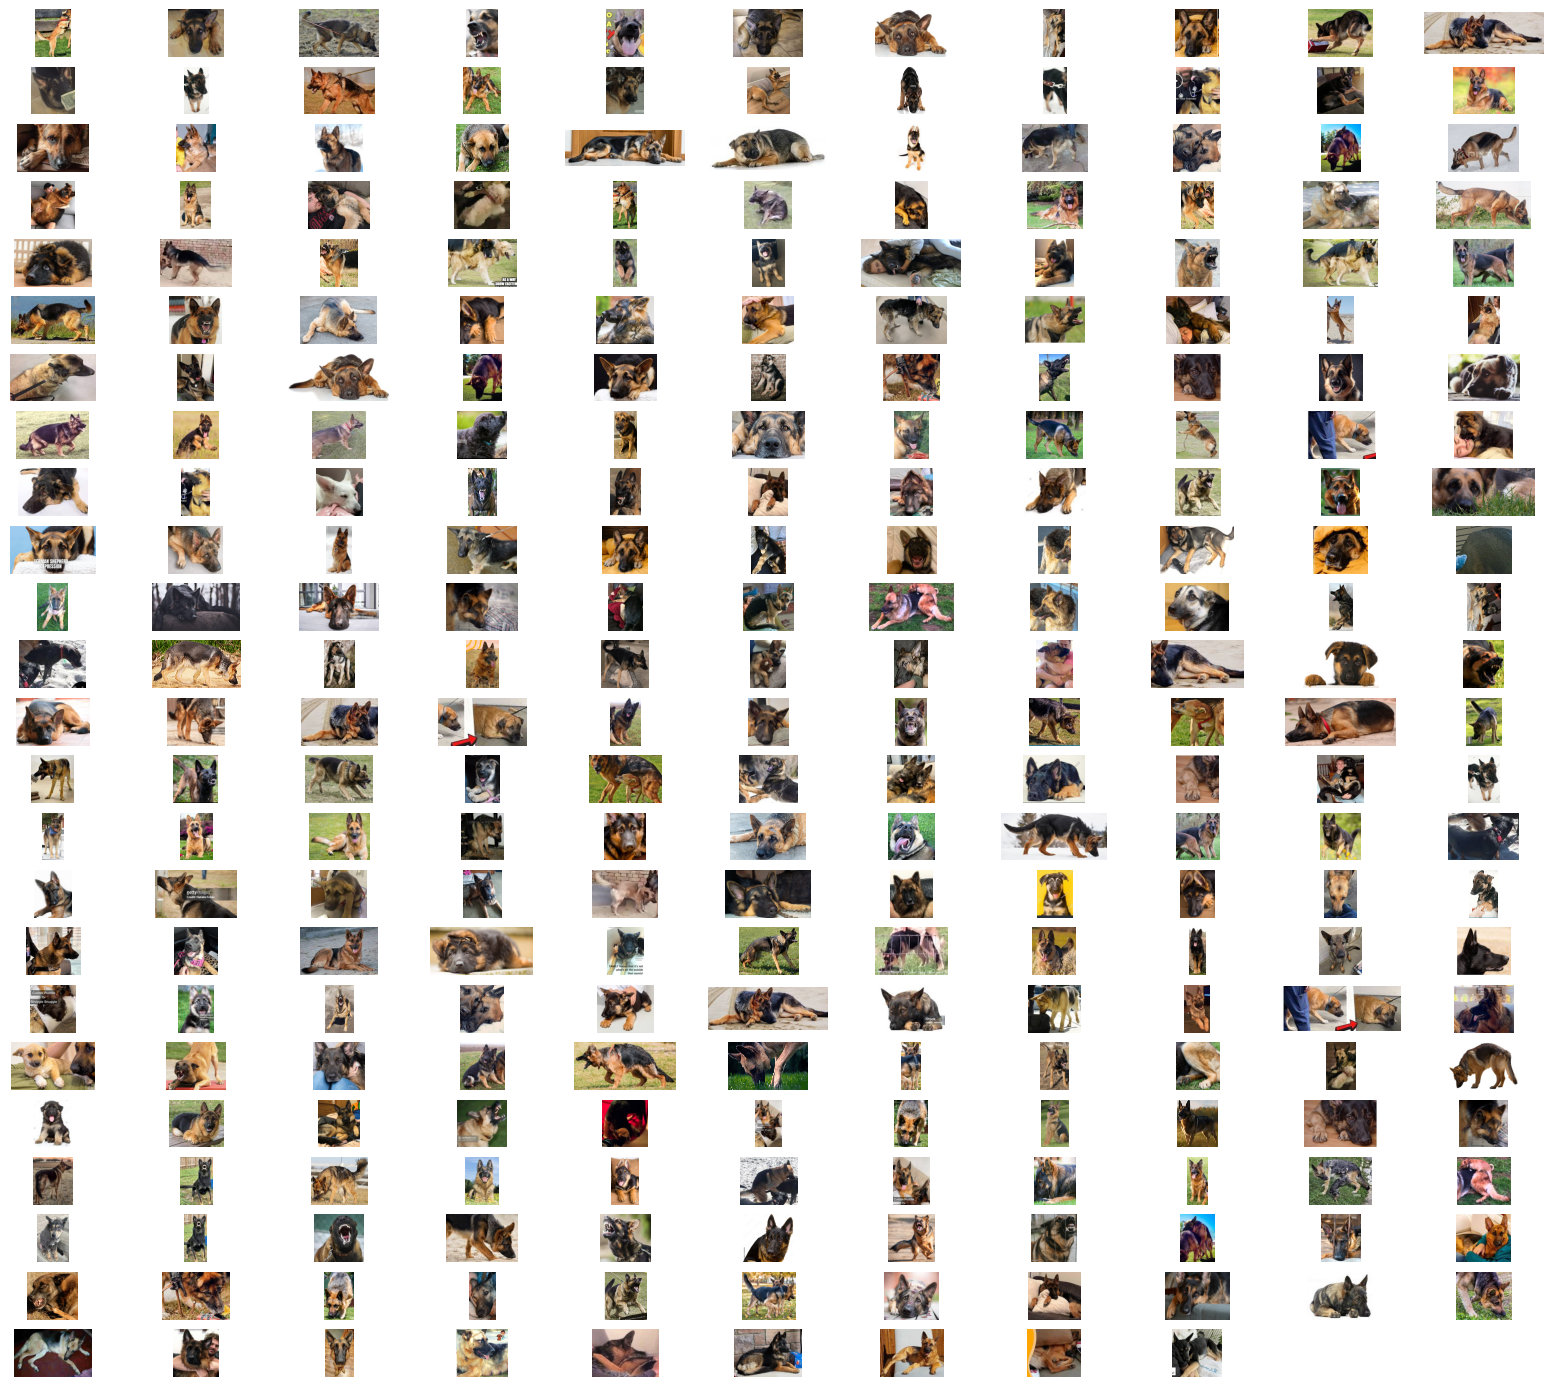

In [88]:
dataset = GSDDataset(transform=None)
dataset.__len__()
rows = 27
columns = 11
fig = plt.figure(figsize=(20, 20))
for i in range(1, dataset.__len__()):
    fig.add_subplot(rows, columns, i)
    plt.imshow(dataset[i])
    plt.axis('off')